In [49]:
#Dr Calbert Graham
#Phonetics Laboratory, University of Cambridge


# 1. Introduction
In this experiment, as a preliminary step to doing the tweet data analysis, we will try to find the distribution that best fits the data. The approach here will entail choosing one or multiple models (specifric of classes of distributions) from which the data might be drawn. We will follow the following iterative approach based on 4 steps to fit the distribution:

1. **Find the distribution from which the data might be drawn**;
2. **Estimate the parameters of that distribution**;
3. **Evaluate the quality of the fit**;
4. **If the fit is not good enough, go back to 1; otherwise stop**

We will rely on two very important tools: the plot of the CCDF distribution (tail distrubution) a log-log scale and a qqplot.

The plot of the CCDF on a log-log scale allows us to make a very strong guess at which class of distribution the data belongs to (i.e., exponential, extreme value, or heavy-tailed), by visually “testing" what type of tails that are exhibited.

We will use the seaborn library function ecdfplot() to plot the cumulative distribution function (CCDF).

In [40]:
#import packages and dataset

import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
from google.colab import files
#tweet_data = files.upload()
tweet_data = pd.read_csv("http://www.eecs.qmul.ac.uk/~linwang/download/ecs764/tweet-time-series", header=None, sep=" ")
'''This data is a time-series of the number of tweets per second.
 The 1st column is the second and the 2nd column is the number of tweets recorded during this second.'''
#import io
#data = pd.read_csv(io.BytesIO(data['tweet-time-series.txt']))
# Dataset is now stored in a Pandas Dataframe
#display(data)
# I sub-select seconds 60000-69,999 for fitting the distribution
tweet_data1 = tweet_data.iloc[60000:100000, 1]
display(tweet_data1)




60000    33
60001    37
60002    27
60003    37
60004    28
         ..
99995     3
99996     4
99997     2
99998     2
99999     3
Name: 1, Length: 40000, dtype: int64

# 2. Model selection

Here we will plot the CCDF of the data to examine the tail and select the most appropriate model. The distribution is a theoretical model of the data.

We will following these steps:
1. find the most appropriate class  
2. create a shortlist of candidate distributions 
3. narrow down the field to a specific distribution

In [19]:
'''When observing the CCDF this data, what can you say about the distribution and its tail? To help
you, generate random numbers distributed according to Normal, Weibull, and Pareto distributions, and have a look at the CCDF for them.'''

'When observing the CCDF this data, what can you say about the distribution and its tail? To help\nyou, generate random numbers distributed according to Normal, Weibull, and Pareto distributions, and have a look at the CCDF for them.'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'density of tweet ts')

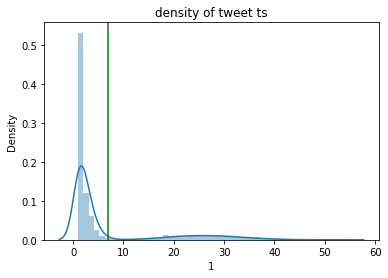

In [20]:

#density plot plotted to get a sense of distribution
sns.distplot(tweet_data1, bins = 50)
median = np.median(tweet_data1)
mean = np.mean(tweet_data1)
plt.axvline(x = mean, color = 'green')
plt.title("density of tweet ts")

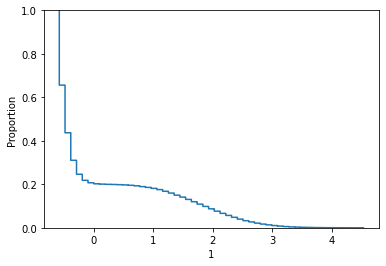

In [21]:
#CCDF of the sub-selected data
# CCDF is the complementary of CDF (i.e. 1-CDF)
def standardize(data):
  z = (data - np.mean(data))/np.std(data)
  return z
data = standardize(tweet_data1)
sns.ecdfplot(data, complementary = True)


For visual inspection, here we generate three different tails to compare: normal (exponential), weillbull (extreme - skewed) and pareto(heavy-tailed)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

<Figure size 432x288 with 0 Axes>

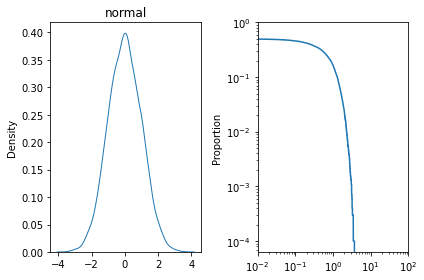

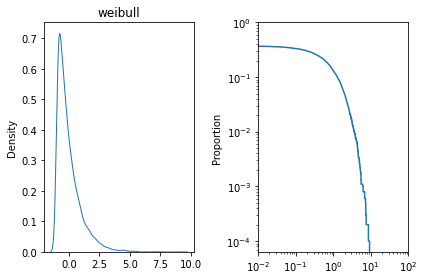

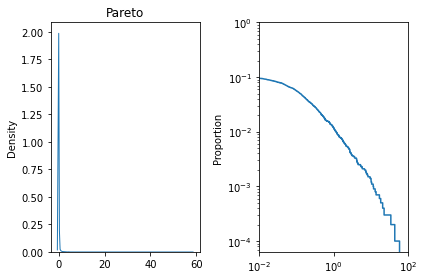

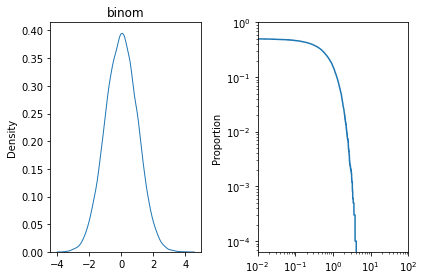

<Figure size 432x288 with 0 Axes>

In [46]:

# log-log CCDF plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def standardize(data):
  z = (data - np.mean(data))/np.std(data)
  return z
# Generate selected three patterns using random data - 10000 data points in each
x1 = np.random.normal(0,1,10000)
x2 = np.random.weibull(1 ,10000)
x3 = np.random.pareto(1 ,10000)
x4 = np.random.normal(0,1, 10000)

#We standardise the variables
x1 = standardize(x1)
x2 = standardize(x2)
x3 = standardize(x3)
x4 = standardize(x4)
x5 = np.concatenate([x1, x4])


# normal - exponential
plt.figure()
plt.subplot(121)
sns.distplot(x1, hist = False, kde=True, norm_hist=True,kde_kws={'linewidth':1})
plt.title('normal')
plt.subplot(122)
sns.ecdfplot(x1, complementary = True)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01,100)
plt.tight_layout()
plt.figure()


#weibull
plt.subplot(121)
sns.distplot(x2, hist = False, kde=True, norm_hist=True,kde_kws={'linewidth':1})
plt.title('weibull')
plt.subplot(122)
sns.ecdfplot(x2, complementary = True)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01,100)
plt.tight_layout()
plt.figure()

# pareto - heavy-tailed
plt.subplot(121)
sns.distplot(x3, hist = False, kde=True, norm_hist=True,kde_kws={'linewidth':1})
plt.title('Pareto')
plt.subplot(122)
sns.ecdfplot(x3, complementary = True)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01,100)
plt.tight_layout()
plt.figure()

# binomial - mixed
plt.subplot(121)
sns.distplot(x5, hist = False, kde=True, norm_hist=True,kde_kws={'linewidth':1})
plt.title('binom')
plt.subplot(122)
sns.ecdfplot(x4, complementary = True)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01,100)
plt.tight_layout()
plt.figure()




**Question: What is the most appropriate distribution for the data?**
From these CCDF plots, it can be observed that the tail of CCDF of the data decreasing fast in such a way that it appears to match either an exponential or an extreme value distribution. We can therefore immediately rule out heavy-tailed distribution. 

Between exponential and extreme value it would seem to match exponential better because of the sharp corners, although it is quite difficult to tell them apart purely on the basis of visual inspection. 


# 3. Model Likelihood estimation

On the basis of the visual inspection in the previous section, I estimated that the model distribution is either extreme or exponetnital, but we could not determine which on the basis of visual inspection alone.
This leaves us with various options - exponential distrubution: Normal, Exponential and extreme distributions: Gamma, and Lognorm. Therefore, we now need to estimate the parameters of the candidate distributions, i.e., step 2 of the methodology set out in the Introduction.

The basic assumptions of MLE:

Known: a set of data variables,probability distribution model
Unknown: model parameters
Assumption: all the data variables are independent and identically distributed(iid)

There are various methods available to do this, but here I use a statistical method: hyptothesis testing to test the goodness of fit/quality of the data fitting. Specifically, I will implement the Kolmoforov-Smirnov (KS) test here, though a Chi Square test would be more useful for categorical data (e.g. a Poission distribution).

KS test computes the empirical distribution function from the data and then compares it with the theoretical distribution function for the specified distribution. Empirical Distribution Function (add formula here) gives an approximation of the theoretical Cumulative Density Function (CDF). Essentially, this divides the whole observation space into many discrete areas. For each area, it computes the normal sample that has a value smaller than the boundary of the area. It is therefore a very good approximation of the cumulative distribution function.

Basic steps:
(1) We use the largest vertical distance between the two graphs as the test statistic - the smaller the distance the better the fit.

(2) We can then calculate the p-value

(3) If the distance is too large for a given significance level, the null hypothsis is rejected - the larger the distance the smaller the p-value

(4) Make a decision: Rejecting null hypothesis means the two datasets have different distributions.







(3.4106051316484806e-17, 0.9999999999999999)


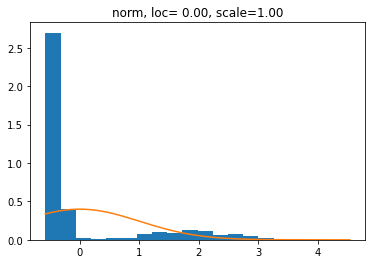

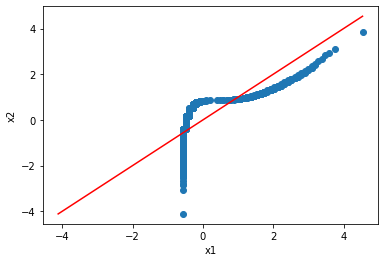

p = 0.0 

distance = 0.3676571753057786 



AttributeError: ignored

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.stats as st

def standardize(observation):
  z = (observation-np.mean(observation))/np.std(observation)
  return z

def get_quantiles(data):
    quantiles = []
    for q in np.arange(0, 1.001, 0.001):
        quantiles.append(np.quantile(data, q))
    return quantiles    

def pyqqplot(data1, data2):
    plt.figure()
    data1 = standardize(data1)
    data2 = standardize(data2)
    q1 = np.array(get_quantiles(data1))
    q2 = np.array(get_quantiles(data2))
    plt.scatter(q1, q2 )

    minim = min(data1.min(), data2.min())
    maxim = max(data1.max(), data2.max())
    plt.plot([minim, maxim], [minim, maxim], 'r-')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

x = data

# Use Scipy to create a dist_name_list so that all 4 distrbutions are presented together
dist_name_list = ['norm', 'expon', 'gamma','lognorm']
for dist_name in dist_name_list:
  dist = getattr(scipy.stats, dist_name)
  param = dist.fit(x) #get parameters of the distribution; x is the data
  print(param)
  x_sort = np.sort(x)
  pdf_fitted = dist.pdf(x_sort, *param)
  plt.figure()
  plt.hist(x, density=True, bins=20)
  plt.plot(x_sort,pdf_fitted)
  mystr = '%s, loc= %0.2f, scale=%0.2f' % (dist_name, param[-2], param[-1])
  plt.title(mystr)
  y = dist.rvs(*param, size=10000)
  pyqqplot(x,y)

  '''implement the Kolmogorov-Smirnov (KS) test here to compare the distribution by quantifying the distance between 
  two samples: the reference distribution (norm, exponential, gamma, lognorm) and the empirical distribution function of the data)'''

  # aa is the distance variable and test statitic p-value
  aa, p = scipy.stats.kstest(x,dist_name, args=param)
  print('p =', p, '\n')
  print('distance =', aa, '\n')




ANSWER: Q3.3: 1. The standard deviation fitted by MLE for the normal distribution is high, i.e., much higher than 1.


In [43]:
'''Q3.4 - Checking the fit based on the qqplot: Based on the visual inspection of the 4 different qqplots,
which one(s) of the following assertions is (are) correct:
1. The Normal distribution fits the data well.
2. The Exponential distribution fits the data well.
3. The Gamma distribution fits the data well.
4. The Lognorm distribution fits the data well.
5. None of the mentioned distributions fit the data well.'''

'Q3.4 - Checking the fit based on the qqplot: Based on the visual inspection of the 4 different qqplots,\nwhich one(s) of the following assertions is (are) correct:\n1. The Normal distribution fits the data well.\n2. The Exponential distribution fits the data well.\n3. The Gamma distribution fits the data well.\n4. The Lognorm distribution fits the data well.\n5. None of the mentioned distributions fit the data well.'

Based on the qq plots and the KS test, it would appear that actually none of the distributions we experimented with fits the data.

Given that the data is likely to be distributed according to a distribution of a specific class, we will need to reflect on what we might have done differently to improve the fit to the data. This takes us back to Step 1 of the introduction. Options that we can change include:

(1) selecting a different distribution (e.g. a _bimodal_ one, such as a _mixture_ of normal distributions) 

(2) selecting a different subset of data are viable ways to improve the fit.

As the KS test is based on maximum distance of the whole CDF function, outliers would affect its accuracy. However, manual paramter tuning can be highly problematic, so alternative tests like the Shapiro Wilks that can automatically test whether the data is normally distributed without having to manually specify the parameters
